# Reliance Stock Analysis

## Introduction

In this notebook, we will analyze the historical stock data for Reliance to understand the trends and patterns over time. Our analysis will focus on:
1. Price Trend Over Time
2. Monthly Average Volume
3. Monthly Returns Analysis

The dataset used contains daily stock information for Reliance, including date, open, close, high, low prices, volume, and more. Let’s start by visualizing and analyzing each aspect.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Data Loading and Preparation

We begin by loading the data and preparing it for analysis. The `Date` column is converted to a datetime format for proper chronological analysis, and the data is sorted by date. This allows us to perform accurate time-based analysis and aggregation.

In [2]:
# Load the dataset
file_path = '/kaggle/input/reliance-dataset/reliance_data.xlsx'  # Adjust path as necessary
reliance_data = pd.read_excel(file_path)

In [3]:
# Data Preprocessing
reliance_data['Date'] = pd.to_datetime(reliance_data['Date'])
reliance_data.sort_values('Date',inplace=True)

# Ensure 'Date' is in datetime format
features = ['Open', 'High', 'Low', 'Volume']  # Define feature columns
target = 'Close'  # Define target column

In [4]:
# Handling Missing Values
reliance_data_clean = reliance_data.dropna(subset=features + [target])

In [5]:
# display the head of data
print(reliance_data.head())

         Date    Symbol Series  Prev Close    Open   High     Low  Last  \
0  1996-01-01  RELIANCE     EQ      204.65  205.00  206.1  203.65   NaN   
22 1996-01-02  RELIANCE     EQ      176.75  175.00  185.0  174.50   NaN   
42 1996-01-03  RELIANCE     EQ      211.85  213.50  216.2  208.55   NaN   
61 1996-01-04  RELIANCE     EQ      206.85  207.75  209.5  206.00   NaN   
82 1996-01-05  RELIANCE     EQ      244.65  267.00  269.9  264.25   NaN   

     Close    VWAP    Volume         Turnover  Trades  Deliverable Volume  \
0   205.75  205.26   3717450   76300000000000     NaN                 NaN   
22  183.85  180.21  22865050  412000000000000     NaN                 NaN   
42  213.05  212.61  25819450  549000000000000     NaN                 NaN   
61  208.80  208.27   8836850  184000000000000     NaN                 NaN   
82  266.05  266.32  17689800  471000000000000     NaN                 NaN   

    %Deliverble  
0           NaN  
22          NaN  
42          NaN  
61          Na

## 1. Price Trend Over Time

The first analysis focuses on the **Price Trend Over Time**. Here, we plot the `Close` price of Reliance stock over the years to visualize the price movement.

**Key Observations**:
- A long-term upward trend may indicate positive growth.
- Periods of sudden increase or decrease may correspond to major economic events or company-specific news.

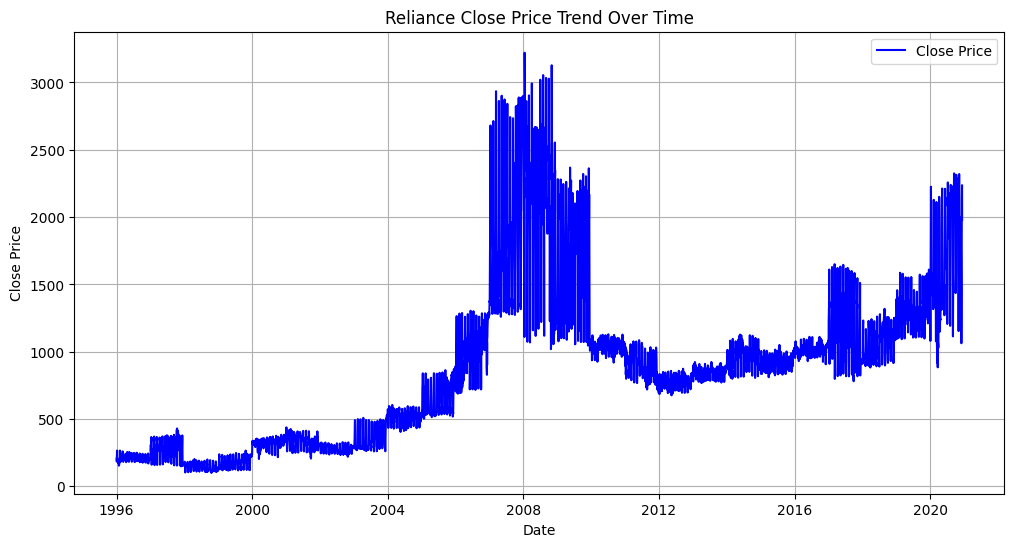

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(reliance_data['Date'], reliance_data['Close'], color='blue', label='Close Price')
plt.title('Reliance Close Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

## 2. Monthly Average Volume

Next, we examine the **Monthly Average Volume** to understand the average trading activity for Reliance on a monthly basis. By grouping the data by each month, we calculate the average volume and plot it over time.

**Key Observations**:
- Higher volume in certain months can indicate increased investor interest or response to significant events.
- Peaks and troughs in volume can show market sentiment around specific dates.

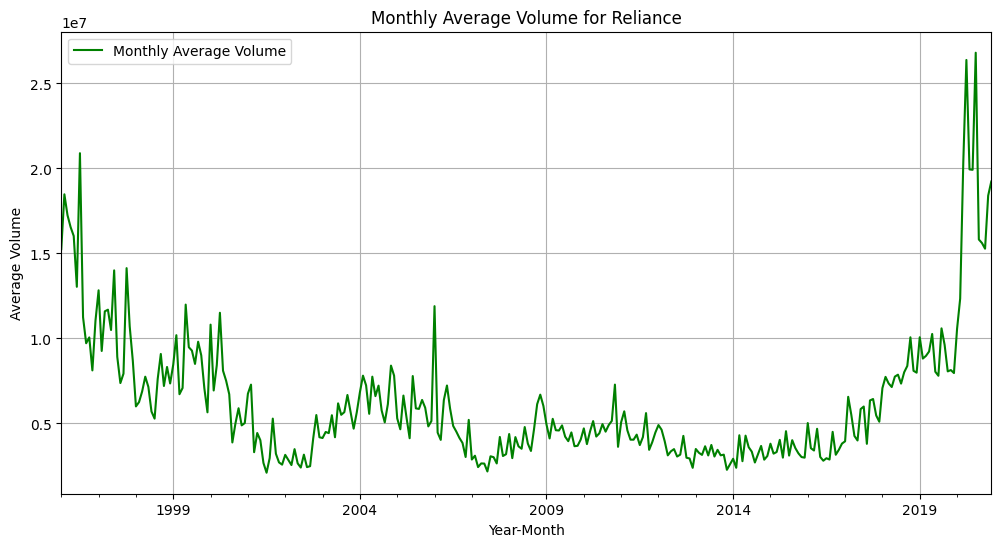

In [7]:
# Create a Year-Month column for grouping
reliance_data['YearMonth'] = reliance_data['Date'].dt.to_period('M')

# Calculate Monthly Average Volume
monthly_avg_volume = reliance_data.groupby('YearMonth')['Volume'].mean()

# Plot Monthly Average Volume
plt.figure(figsize=(12, 6))
monthly_avg_volume.plot(kind='line', color='green', label='Monthly Average Volume')
plt.title('Monthly Average Volume for Reliance')
plt.xlabel('Year-Month')
plt.ylabel('Average Volume')
plt.legend()
plt.grid(True)
plt.show()

## 3. Monthly Returns Analysis

The **Monthly Returns** analysis measures the percentage change in the `Close` price from the beginning to the end of each month. Monthly returns are calculated as the percentage difference in closing prices from month to month, providing insight into the stock's volatility and performance.

**Key Observations**:
- Positive returns indicate a monthly increase in value, while negative returns show a decrease.
- Periods of high volatility or significant returns can highlight times when the stock experienced major movement, possibly due to external factors.

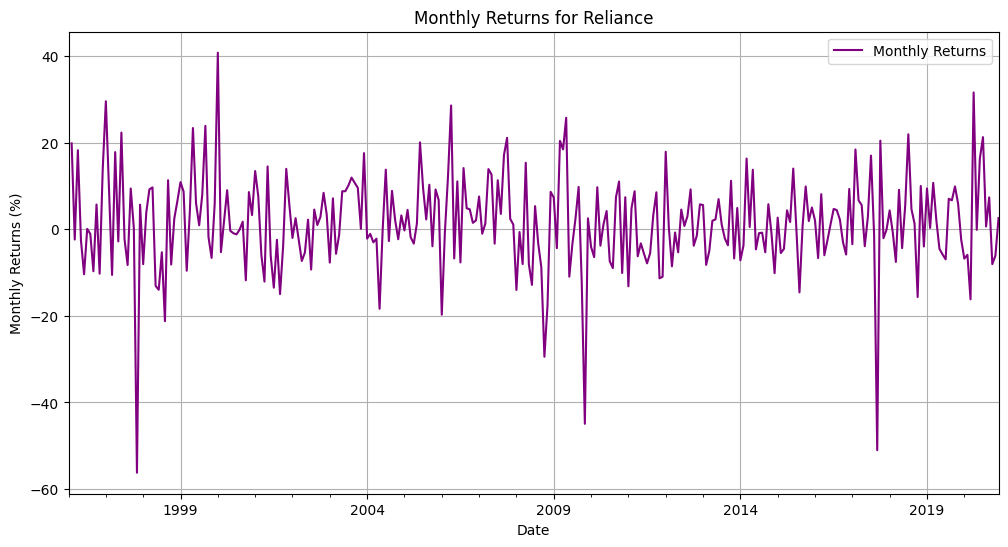

In [8]:
# Resample to get the last closing price of each month
monthly_close = reliance_data.set_index('Date').resample('ME')['Close'].last()
monthly_returns = monthly_close.pct_change() * 100  # Convert to percentage

# Plot Monthly Returns
plt.figure(figsize=(12, 6))
monthly_returns.plot(kind='line', color='purple', label='Monthly Returns')
plt.title('Monthly Returns for Reliance')
plt.xlabel('Date')
plt.ylabel('Monthly Returns (%)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Prepare feature matrix (X) and target vector (y)
X = reliance_data_clean[features]
y = reliance_data_clean[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
variance = np.var(y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")
print(f"Variance of Predictions: {variance}")

Mean Absolute Error (MAE): 6.641881144238513
Mean Squared Error (MSE): 156.9023635606366
Root Mean Squared Error (RMSE): 12.526067362130725
R^2 Score: 0.999545570016866
Variance of Predictions: 343877.828476642


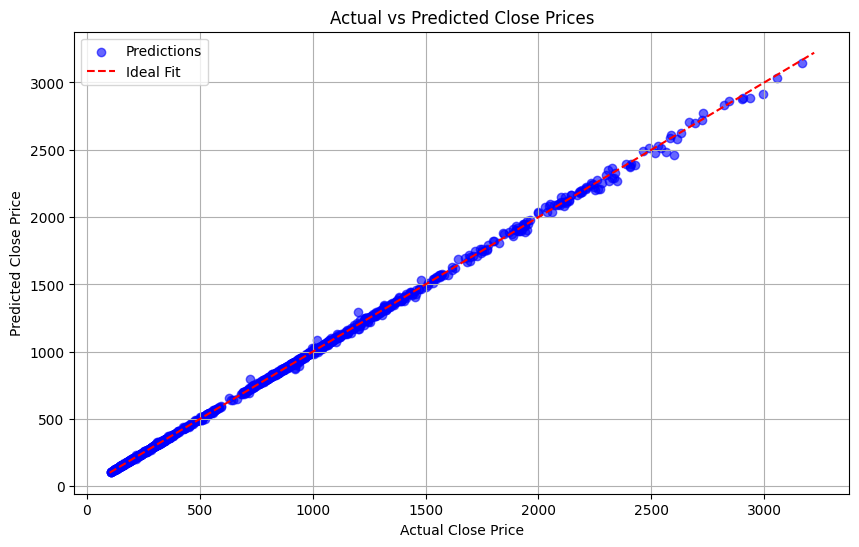

In [10]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.legend()
plt.grid(True)
plt.show()

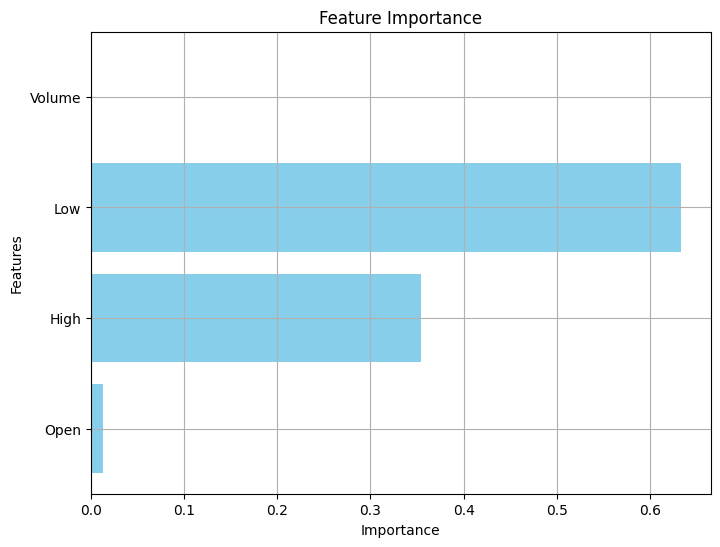

In [11]:

# Plot feature importance
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True)
plt.show()

## Conclusion

This analysis provided insights into the price trend, average trading volume, and monthly returns for Reliance stock. Understanding these aspects can be beneficial for investors and analysts, helping them to identify patterns, assess risks, and make more informed decisions based on historical trends.

**Further Analysis Ideas**:
- Investigate correlation with market events or economic indicators.
- Use additional technical indicators (like moving averages) to support trend analysis.
- Perform similar analyses on other stocks to compare performance.